# 01-Learning-dataset

The main purpose of this notebook is to understand dataset better. This notebook is a sandbox to find ways how to download / preprocess data, what dataset contains and how to visualize it. Hopefully we can formulate our initial hypothesis based on data.

First, let's download the dataset and check raw data:

In [15]:
from torch_geometric.datasets import TUDataset

# download dataset
dataset = TUDataset(root="../datasets/", name="IMDB-BINARY")

After downloading dataset we can see that `torch_geometric` created next file structure:

```
GCN-tutorial
│   README.md
│
└───datasets
    └───IMDB-BINARY
        │
        └───processed
        │   │   data.pt
        │   │   pre_filter.pt
        │   │   pre_transform.pt
        │   
        └───raw
            │   IMDB-BINARY_A.txt
            │   IMDB-BINARY_graph_indicator.txt
            │   IMDB-BINARY_graph_labels.txt

```


Processed data is torch tensors, however for learning purposes we are going to be interested in `IMDB-BINARY/raw` folder.

We can see that it contains 3 files, `A.txt`, `graph_indicator.txt` and `labels.txt`. `A.txt` contains information about edges (nodes are actors, edges represent whether actors filmed before together, graph is a film). `graph_indicator.txt` contains information what graph each node correlated to. Basically what edge corresponds to what graph. And `labels.txt` labels each graph whether it represents action or drama movie.

If you look into the files you may notice that each actor seems to be present in only one movie. That's actually not a true statement. Dataset explicitly removed out-of-the-structure information (additional features: actor names, nation e.t.c.). Idea is to determine subgraph (film) genre just by looking at actors correlations before filming started. We are sceptical of this approach, and for that reason why we want to look at the data ourserves and try to formulate some hypothesis, we even considering making pytorch implementation of GCN first in order to prove that dataset is trainable and simple enough in a tutorial.  

Now when we understand data, let's look at it. As our dataset contains 1000 subgraphs which is too big amount to render at once, however we can look at subgraphs samples themselves.

In [16]:
# what subgraph looks like as pytorch-tensort
list(dataset[0])

[('edge_index',
  tensor([[ 0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,  1,  2,  2,  2,  2,  2,
            2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
            3,  3,  4,  4,  4,  4,  4,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
            6,  6,  6,  6,  6,  7,  7,  7,  8,  8,  8,  8,  8,  8,  8,  8,  9,  9,
            9,  9,  9, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12,
           12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14,
           15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17, 17, 17, 17,
           18, 18, 18, 18, 18, 18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19,
           19, 19],
          [ 2,  4,  5,  9, 10,  2,  6,  8, 12, 14, 17, 18, 19,  0,  1,  3,  4,  5,
            6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,  2,  6, 11, 12,
           16, 19,  0,  2,  5,  9, 10,  0,  2,  4,  9, 10,  1,  2,  3,  8, 11, 12,
           14, 16, 17, 18, 19,  2, 13, 15,  1,  2, 

Some more human-friendly visuals in order to try to define some patterns in label/graph structures.

In [17]:
from torch_geometric.utils import to_networkx
from torch_geometric.data.data import Data
import networkx as nx


def visualize_graph(subgraph: Data, colours: tuple[str] or dict[str] = ('#ff00ff', '#00ff00'), ax = None):
    # extract graph label in order to color it
    graph_label = subgraph.y[0].detach().numpy()
    
    # convert pytorch graph to networkx and draw it
    nx.draw(to_networkx(subgraph, to_undirected=True), with_labels=True, node_color=colours[graph_label], ax=ax)

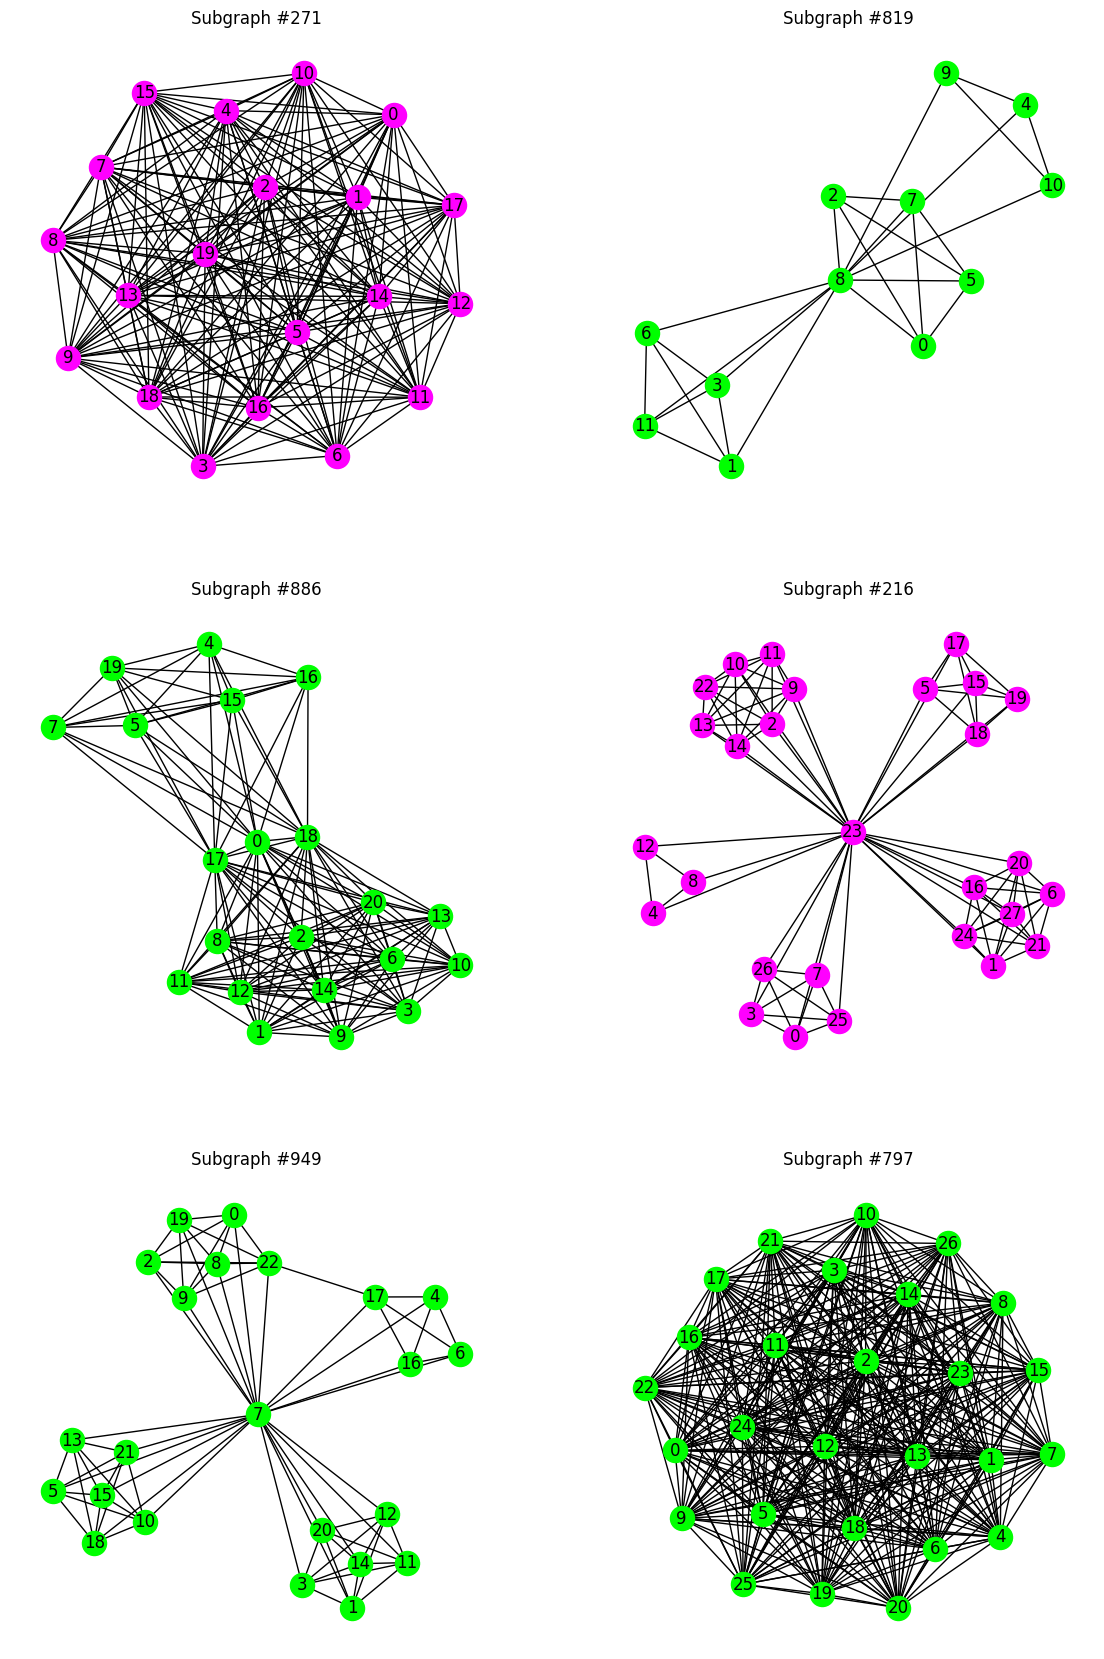

In [18]:
import numpy as np
import matplotlib.pyplot as plt

# sample random subgraphs
samples = np.random.randint(0, 999 + 1, size=6)

# initialize plots
fig, axs = plt.subplots(3, 2, figsize=(7 * 2, 7 * 3))

# visualize for each sample'd subgraph
idx = 0
for i in range(axs.shape[0]):
    for j in range(axs.shape[1]):
        
        # stopping criteria (if sample size < axis.size)
        if idx >= len(samples):
            break
            
        visualize_graph(dataset[samples[idx]], ax=axs[i, j])
        axs[i, j].set_title(f"Subgraph #{samples[idx]}")
        
        idx += 1

### Attempt to formulate hypothesis

By running upper cell several times it's hard to formulate hypothesis. On the first hand, we see that purple (action) movies seems to have two types of architectures: whether everyone already played with each other, or when there is 1 'main' actor that is connected to all others. When green (drama) on the other hand, tends to some sort-of a mixed structure (several 'main' actors). It is still inconclusive and we are still working on it. It's just our current observation on such small subsample.

# Credits

Notebook was made by GCN-tutorial team for the Innopolis 'Data and Knowledge representation' course.

> [Polina Zelenskaya](github.com/cutefluffyfox) \
> [Said Kamalov](github.com/SaidKamalov) \
> [Lev Rekhlov](github.com/plov-cyber) 